<a href="https://colab.research.google.com/github/LEEHYUNJI94/Python/blob/master/Open%20CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Open CV 기본 사용법**


> CoLab에서 파일 업로드
*   파일은 주기적으로 초기화되기 때문에, 계속 업로드 필요


In [2]:
from google.colab import files
uploaded = files.upload()

Saving sunflower.jpg to sunflower.jpg




> OpenCV의 기본적인 함수¶
*   cv2.imread(file_name, flag)
*   cv2.imshow(title, image)
*   cv2.cvtColor(image, flag)


> Matplotlib사용으로 이미지 동작시킬 수 있음 
*   OpenCV는 BGR을 기준, Matplotlib는 RGB 기준







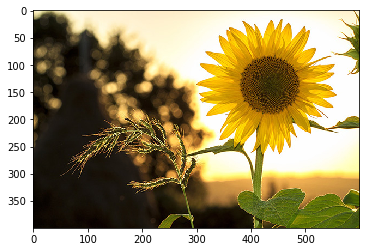

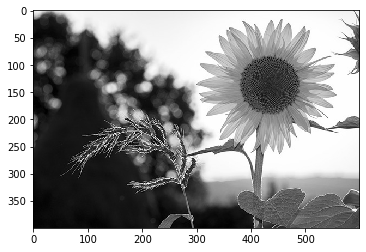

In [36]:
import cv2
import matplotlib.pyplot as plt

img_basic = cv2.imread('sunflower.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_BGR2RGB))
plt.show()

img_basic = cv2.cvtColor(img_basic, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_GRAY2RGB))
plt.show()


> OpenCv이미지 연산


*   픽셀 사이즈 
*   픽셀값 조회시 shape 픽셀 범위 내에서만 조회가능 (6 line)






In [37]:
import cv2
img_basic1 =cv2.imread('sunflower.jpg')
print(img_basic1.shape)  #픽셀 수 확인 (높이,너비)
print(img_basic1.size)

px1 =img_basic1[100,200] #이미지numpy 객체의 특정 픽
print(px1[2])            #R 값만 출력하기

(400, 600, 3)
720000
[ 49  96 128]
128




> OPen CV를 활용한 특정 범위 픽셀 변경
*   time을 이용해 걸리는 시간 측정가능 -> time.time()
*   슬라이싱을 이용해 픽셀 색깔 바꾸기

--- 0.013889074325561523 seconds ---
--- 0.00027632713317871094 seconds ---


<function matplotlib.pyplot.show>

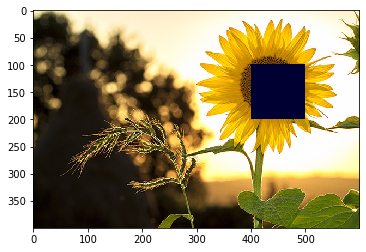

In [49]:
import cv2
import matplotlib.pyplot as plt
import time

img=cv2.imread("sunflower.jpg")

#####특정픽셀에 직접접근해 픽셀 변경-time consuming#####
time_start=time.time()
for i in range(100, 200):
    for j in range(400, 500):
        img[i, j] = [255, 255, 255]
print("--- %s seconds ---" % (time.time() - time_start))

#####슬라이싱을 이용한 픽셀변경-시간절약
time_start=time.time()
img[100:200, 400:500] = [50, 0, 0]  #[높이,너비]

print("--- %s seconds ---" % (time.time() - time_start))

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show

> OpenCV를 활용한 ROI(Region of Interest: 관심 있는 영역) 추출
*   슬라이싱을 이용해 픽셀복제 
*  shape와 동일한 크기로 붙여넣기





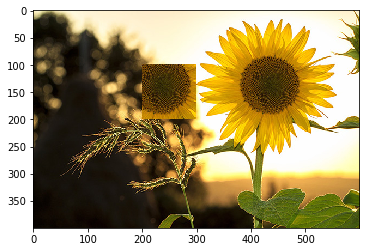

In [70]:
import cv2
import matplotlib.pyplot as plt

imgfortest=cv2.imread("sunflower.jpg")
imgforchco=cv2.imread("sunflower.jpg")

#####슬라이싱으로 ROI처리#####
Reason_of_In=imgfortest[100:200, 400:500]

#####ROI단위로 이미지 복사#####
imgfortest[100:200,200:300]=Reason_of_In  #[200-100:500-400]=[200-100.300-200] 같은 크기여야 ROI처리 후 복사가능

plt.imshow(cv2.cvtColor(imgfortest,cv2.COLOR_BGR2RGB))
plt.show()


> 모든 픽셀값 변경으로 이미지 색깔 변경



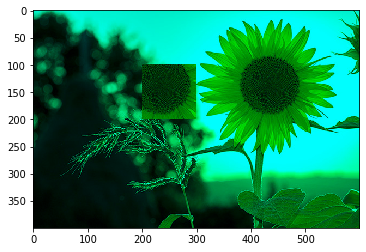

In [69]:
#####픽셀값바꾸기#####
imgfortest[:,:,2]=0 #모든 픽셀에 대한  인덱스 2 = R (cv2는 BGR 이기때문)
plt.imshow(cv2.cvtColor(imgfortest,cv2.COLOR_BGR2RGB))
plt.show()

> OpenCV 이미지 변형 (Image transformation)![대체 텍스트]

*   이미지 크기 조절

1.    보간법(Interpolation)-사이즈가 변할 때 픽셀 사이 값 조절하는 방법
*   CV2.resize(image,dsize,fx,fy,interpolation)

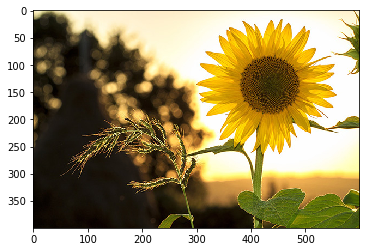

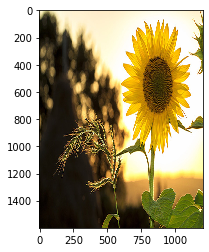

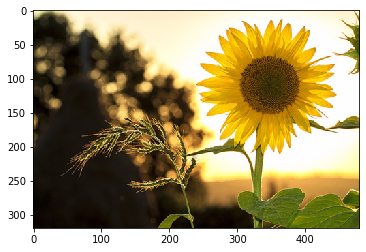

In [24]:
import cv2
import matplotlib.pyplot as plt

#####원본이미지 확인#####
img_Sch=cv2.imread("sunflower.jpg")
plt.imshow(cv2.cvtColor(img_Sch,cv2.COLOR_BGR2RGB))
plt.show()
#####이미지 확대하기#####
expand=cv2.resize(img_Sch,None,fx=2,fy=4,interpolation=cv2.INTER_CUBIC) #이미2배확대(cv2.INTER_CUBIC)를 변수에 넣기
plt.imshow(cv2.cvtColor(expand, cv2.COLOR_BGR2RGB))
plt.show()
#####이미지 축소하기#####
reshrink=cv2.resize(img_Sch,None,fx=0.8,fy=0.8,interpolation=cv2.INTER_AREA)  #이미지0.8배축소(cv2.INTER_AREA)를 변수에 넣기
plt.imshow(cv2.cvtColor(reshrink,cv2.COLOR_BGR2RGB))
plt.show()



> 이미지 위치변경
*   cv2.warpAffine(image,M,dsize)


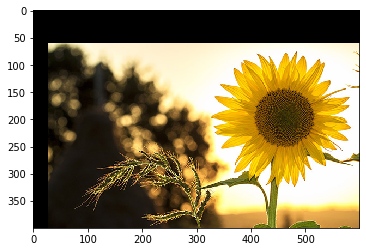

In [23]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_WA=cv2.imread("sunflower.jpg")
height,width = img_WA.shape[:2]    #shape에서 행과 열 정보만 가져옴 shape-행 높이,열 너비,너비

#####변환행렬만들기#####
M=np.float32([[1,0,27],[0,1,60]])  #이동 :  a+tx(27),b+ty(60)좌표를 나타냄

#####변환행렬사용#####
WA=cv2.warpAffine(img_WA,M,(width,height))  # dsize=None이여도 결과 같음
plt.imshow(cv2.cvtColor(WA,cv2.COLOR_BGR2RGB))
plt.show()



> 이미지 회전
*   cv2.getRotationMatrix2D(center, angle, scale)

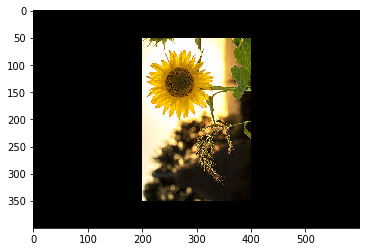

In [30]:
import cv2
import matplotlib.pyplot as plt

img_rot=cv2.imread("sunflower.jpg")
height,width=img_rot.shape[:2]

#####변환행렬만들기#####
m=cv2.getRotationMatrix2D((width/2,height/2),90,0.5) #center: 너비와 높이 중간(/2이기때문) , 각도: 90 , 스케일: 0.5배

#####변환행렬사용#####
RM2=cv2.warpAffine(img_rot,m,(width,height))
plt.imshow(cv2.cvtColor(RM2,cv2.COLOR_BGR2RGB))
plt.show()



> 이미지 합치기
*   cv2.Add()
*   합칠 이미지의 크기는 같아야함

In [43]:
from google.colab import files
upload=files.upload()


Saving sunflower.jpg to sunflower (1).jpg


In [48]:
from google.colab import files
upload=files.upload()

Saving building.jpg to building (1).jpg


(400, 600, 3)
(400, 600, 3)


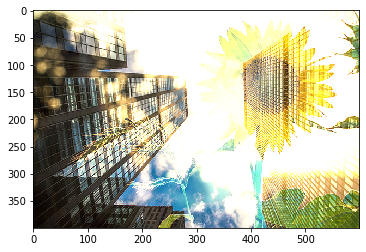

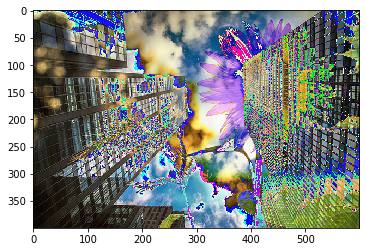

In [49]:
import cv2
import matplotlib.pyplot as plt

img1=cv2.imread("sunflower.jpg")
img2=cv2.imread("building.jpg")
print(img1.shape)
print(img2.shape)

#####Add함수이용#####
result=cv2.add(img1,img2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

#####numpy 합으로 구하기#####
result2=img1 +img2
plt.imshow(cv2.cvtColor(result2,cv2.COLOR_BGR2RGB))
plt.show()